In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Prepare random samples

In [86]:
rainfall = np.array(( 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793.))

np.random.seed(42)
frog_1 = np.random.random(size=100)
frog_2 = np.random.random(size=100)

In [87]:
light_speed = pd.read_csv("michelson_speed_of_light.csv")["velocity of light in air (km/s)"]

In [88]:
from random import gauss

def gauss_random(start, end, size):
    g_dat = np.empty(size)
    for i in range(size):
        g_dat[i] = abs(gauss(start, end))
    return g_dat

# frog_1 = gauss_random(0,1,1000)
# frog_2 = gauss_random(25, 75, 100) 

# plt.hist(frog_1)

In [89]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

frog_1_ecdf = ecdf(frog_1)
frog_2_ecdf = ecdf(frog_2)

# Generating bootstraping sample

In [80]:
# boostrap sample
boot_sample = np.random.choice(light_speed, size=10)

# boostrap replicate
print("Mean:",np.mean(boot_sample))
print("med:",np.median(boot_sample))
print("std:",np.std(boot_sample))


Mean: 299849.0
med: 299825.0
std: 49.48737212663449


In [81]:
# boostrap replicate function
def bootstrap_replicate1d(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

print(bootstrap_replicate1d(light_speed, np.mean))
print(bootstrap_replicate1d(boot_sample, np.mean))

299851.5
299847.0


In [83]:
# Many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate1d(data,func)
    return bs_replicates

draw_bs_reps(light_speed, np.mean, 10000)

array([299840.5, 299869.7, 299847.9, ..., 299851.6, 299841.8, 299844.5])

SEM: 7.861450247886836
STD of bootstrap replicates: 7.8447176296921635
0.9999999999999998


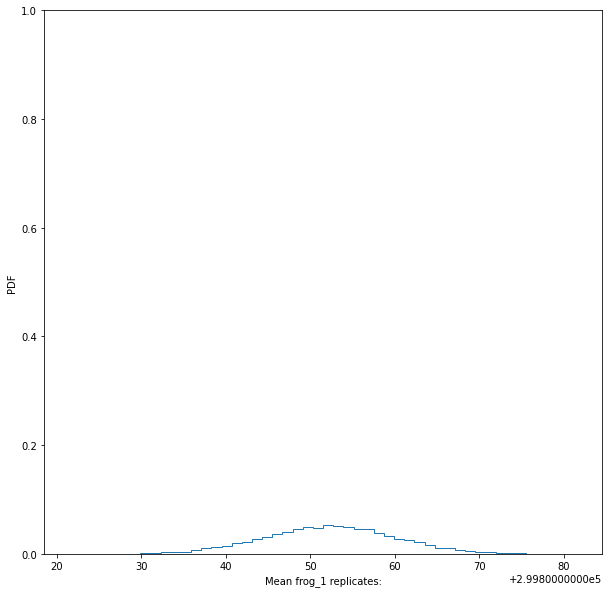

In [84]:
# bootstrap replicates of mean and SEM
bs_replicates = draw_bs_reps(light_speed, np.mean, 10000)

# compute SEM
std_err_mean = np.std(light_speed)/np.sqrt(len(light_speed))
print("SEM:",std_err_mean)

# compute std of bs_replicates
bs_std = np.std(bs_replicates)
print("STD of bootstrap replicates:", bs_std)

#  PLot hist of bs_replicates drawn from sample
_ = plt.rcParams["figure.figsize"] = (10,10)
_ = plt.hist(bs_replicates, bins=50,
            density=True,histtype='step')
_ = plt.ylim(0,1)
_ = plt.xlabel('Mean frog_1 replicates:')
_ = plt.ylabel('PDF')

print((hist * np.diff(bins)).sum())
plt.show()